# 2. Data clustering:

Unsupervised algorithms group multi-dimensional data observations in clusters that share some structural similarities

# 2.1 kmeans algorithm:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations. 


### Ejemplo introductorio:

K-means con unas pocas observaciones


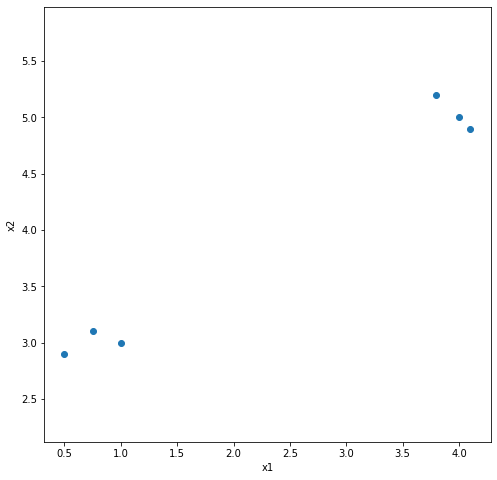

In [1]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [10]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[1 0 1 1 0 0]


In [11]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group

In [12]:
df.head()

,x,y,kmeans
0,1.00,3.0,1
1,3.80,5.2,0
2,0.50,2.9,1
3,0.75,3.1,1
4,4.00,5.0,0


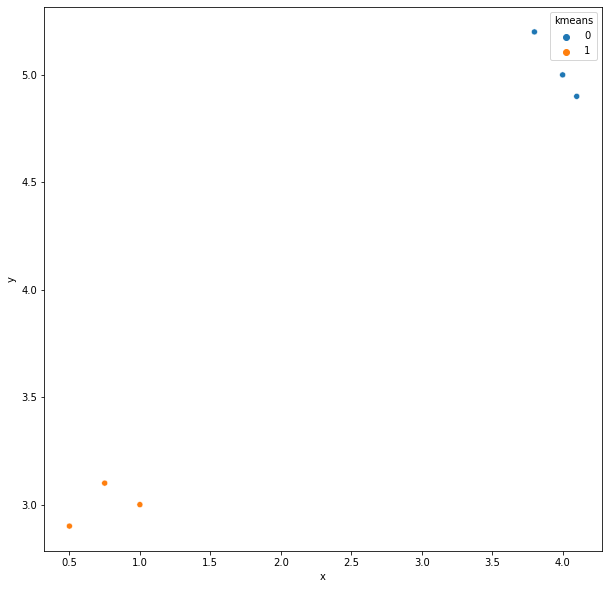

In [13]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTA: Si queremos conocer más detalles sobre los clústeres encontrados, utilizad la función fit y no fit_predict (ésta última devuelve sólo las etiquetas de asignación de las observaciones a clústeres, es decir la predicción del algoritmo k-means). El detalle de variables se puede consultar en https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [14]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [0 1 0 0 1 1]
Posición de los centroides de los clusters [[0.75       3.        ]
 [3.96666667 5.03333333]]
Número de iteraciones necesarias 2


### Clustering the iris dataset:

In [16]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

K-means de los datos iris en 2 dimensiones:

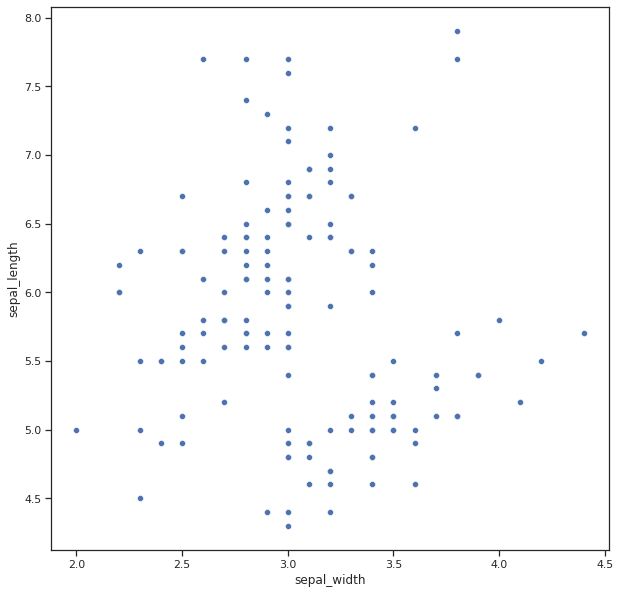

In [17]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='sepal_width',y='sepal_length',data=X)
plt.show()

In [18]:
import numpy as np
D = np.array(X)
D.shape

(150, 4)

Aplicamos k-means

In [21]:
group = KMeans(n_clusters=2).fit_predict(D[:,0:2])
print(group)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]


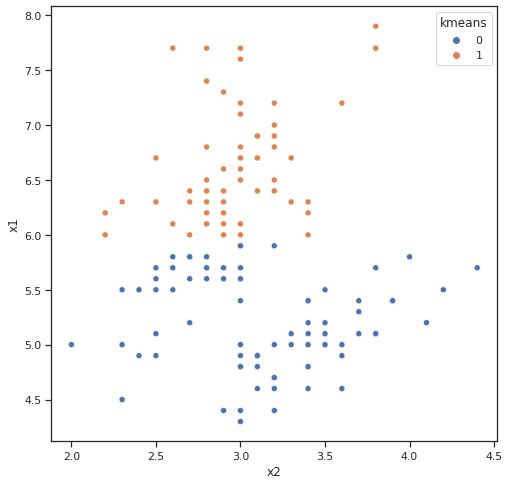

In [24]:
df = pd.DataFrame(D[:,0:2],columns=['x1','x2'])
df['kmeans'] = group 
fig = plt.figure(figsize=(8,8)) 
sns.scatterplot(x='x2',y='x1',hue='kmeans',data=df)
plt.show()

Aplicación a iris en 4D:

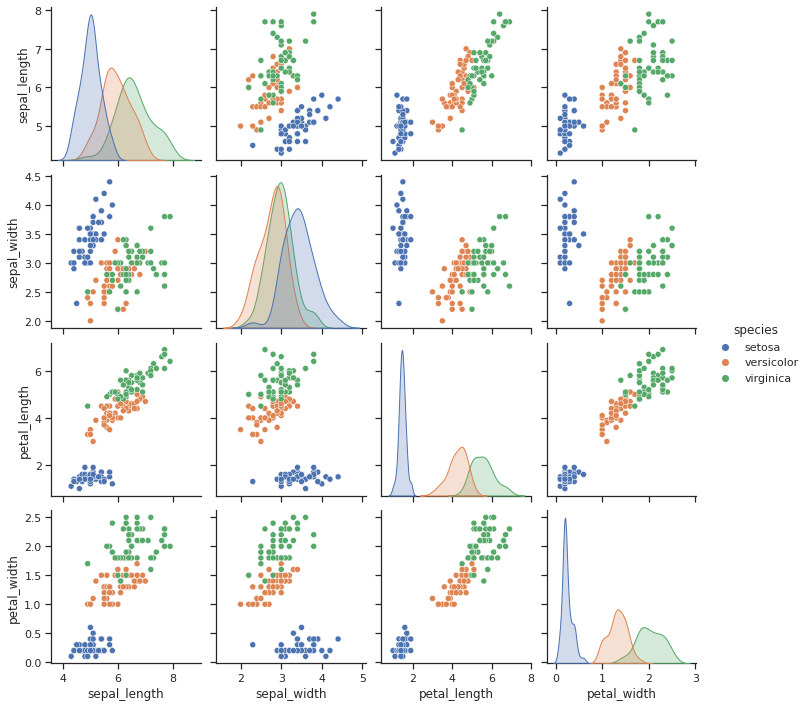

In [25]:
g = sns.pairplot(iris, hue="species")

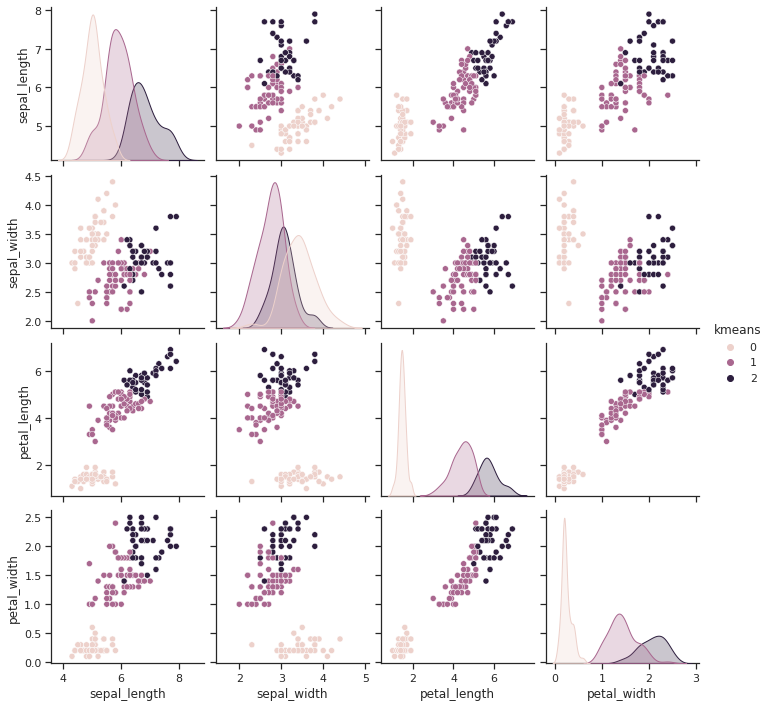

In [27]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(X)

iris_grouped = iris.copy()
iris_grouped['kmeans'] = group
g = sns.pairplot(iris_grouped, hue="kmeans")

In [28]:
iris_grouped.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### Ejercicio: Aplicar k-means a los datos mpg (cars, variables numéricas):
- Cargar datos
- Eliminar variables no-numéricas
- Representar pairplot y decidir cuángos clústers vamos a buscar
- Aplicar k-means
- Representar el resultado como un pairplot con grupos (clústeres)


### Clustering simulated data (Blobs):

We simulate a group of clusters with different relative positions and shapes

Text(0.5, 1.0, 'k-means simple blobs')

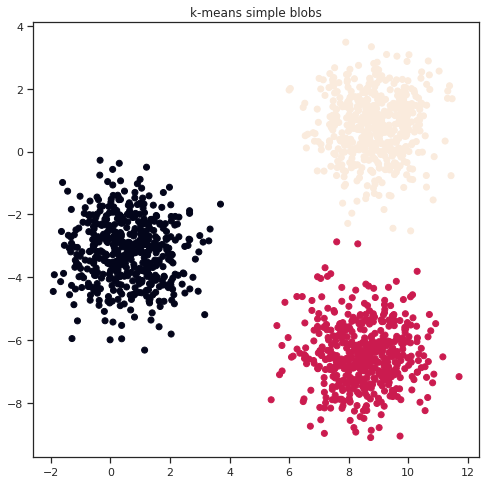

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = 3)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Número incorrecto de clusters en el algoritmo k-means


Text(0.5, 1.0, 'k-means simple blobs')

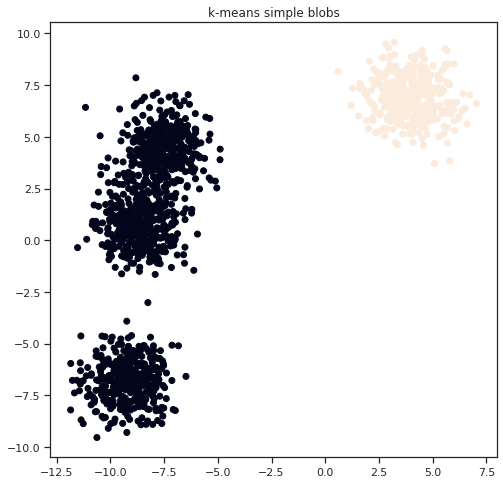

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = 4)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Especificar posición de los blobs generados y su desviación típica:

Text(0.5, 1.0, 'k-means simple blobs')

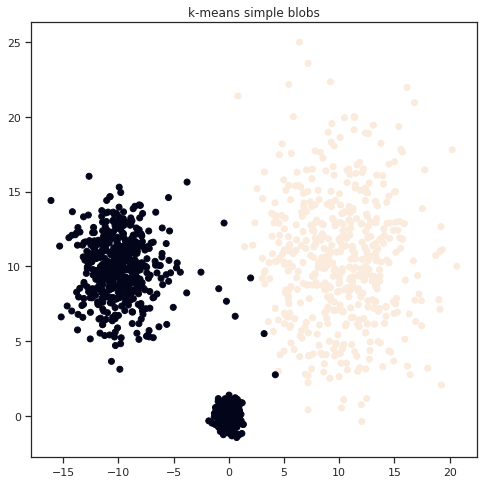

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = [(0,0),(-10,10),(10,10)],cluster_std=(0.5,2,4))

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Casuística variada:

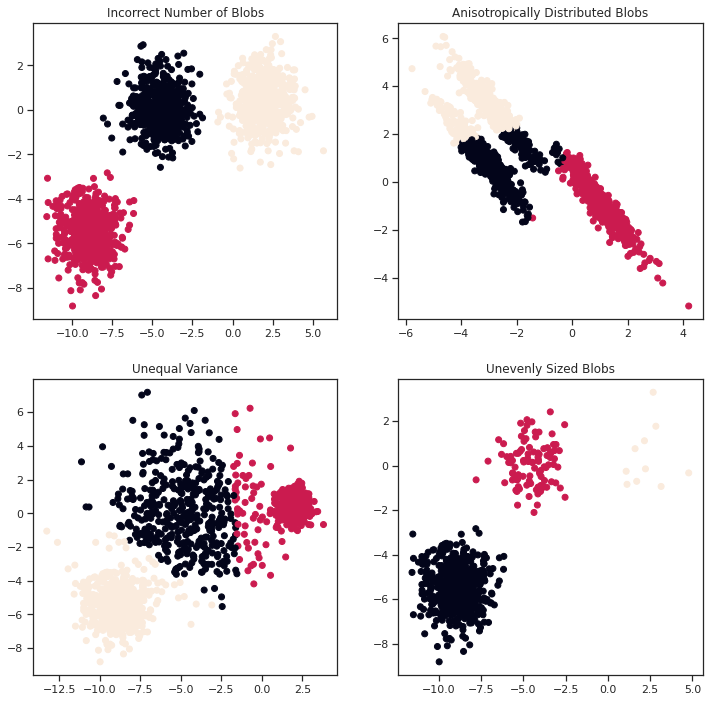

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers = 3 random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropically Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# 2.2 Hierarchical clustering, agglomerative clustering:


Sequence of partitions of the data into a set of clusters. They can be either agglomerative or Divisive: 

- Divisive: Start with all observations in one cluster and slplit the clusters sequencially.

- Agglomerative: Start with as many cluster as observations and group them according to a cluster to cluster distance (linkage). 

Consider two clusters $r$ and $s$ with $n_r$ and $n_s$ observations. A common cluster-cluster distances is: 

\begin{equation*}
d_{min}(r,s) = \min \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s
\end{equation*}
where $d(x_i^r,x_j^s)$ is the euclidean distance between observation $i$ in cluster $r$ and $j$ in cluster $s$.

Other commonly used cluster-cluster distances are: 
\begin{eqnarray*}
d_{max}(r,s) &=& \max \{ d(x_i^r,x_j^s) \}, \, i=1,\dots,n_r ; j=1,\dots,n_s \\
d_{max}(r,s) &=& \frac{1}{n_s n_r}\sum_{i=1}^{n_r} \sum_{j=1}^{n_s} d(x_i^r,x_j^s) 
\end{eqnarray*}



The agglomerative clustering algorithm:

[1] Specify the number of clusters $k$ to be found in data.

[2] Initizlize the number of clusters to the number of observations $N$.  

[3] Group the nearest two clusters based on a cluster-to-cluster distance. 

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_{N-1}$.

[5] Repeat steps 3-4 until the number of clusters is $k$.  



### Ejemplo simple:
Con pocas observaciones en 2D

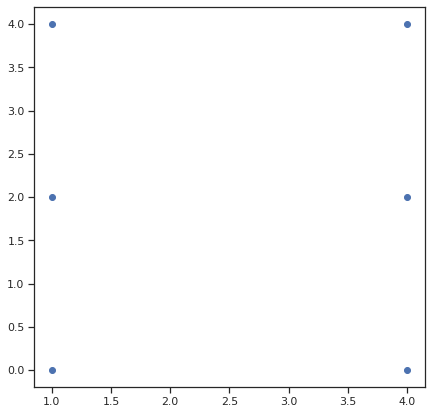

In [41]:
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Aplicamos clustering jerárquico aglomerativo a los datos buscando dos clústers:

In [39]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X) 
clustering.labels_

array([1, 1, 1, 0, 0, 0])

{'color_list': ['g', 'g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [2.0, 3.0, 3.0, 2.0]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'ivl': ['2', '0', '1', '5', '3', '4'],
 'leaves': [2, 0, 1, 5, 3, 4]}

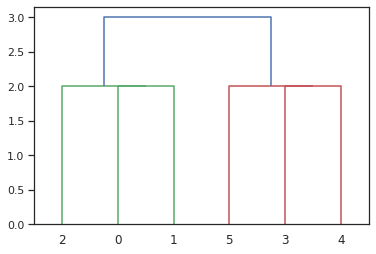

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z) 

Apply to blobs:

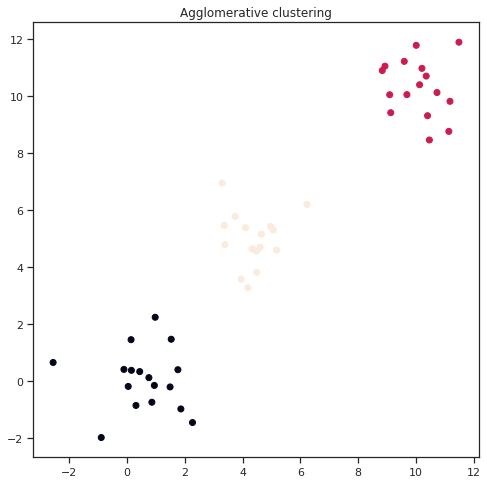

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples = 50
centers = [(0, 0), (5, 5),(10,10)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

clustering = AgglomerativeClustering(n_clusters=3).fit(X) 

plt.figure(figsize=(8, 8))
labels = clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 0.18030959310146177, 0.18030959310146177, 0.0],
  [0.0, 0.5455677782733545, 0.5455677782733545, 0.0],
  [0.0, 0.3080042883248679, 0.3080042883248679, 0.0],
  [0.0, 0.38134049346283494, 0.38134049346283494, 0.3080042883248679],
  [0.0, 0.5584312678185792, 0.5584312678185792, 0.38134049346283494],
  [0.0, 0.5957607779957843, 0.5957607779957843, 0.5584312678185792],
  [0.0, 0.6318502568953898, 0.6318502568953898, 0.5957607779957843],
  [0.0, 0.6590099111154663, 0.6590099111154663, 0.6318502568953898],
  [0.5455677782733545,
   0.6611742828535061,
   0.6611742828535061,
   0.6590099111154663],
  [0.18030959310146177,
   

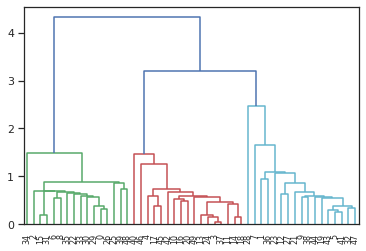

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)

# 2.3 Gaussian Mixture Model Clustering

We model the distribution of the multidimensional observations using a mixture of gaussian distributions: 

  ## $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma_i)$

  ## $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

<Figure size 864x864 with 0 Axes>

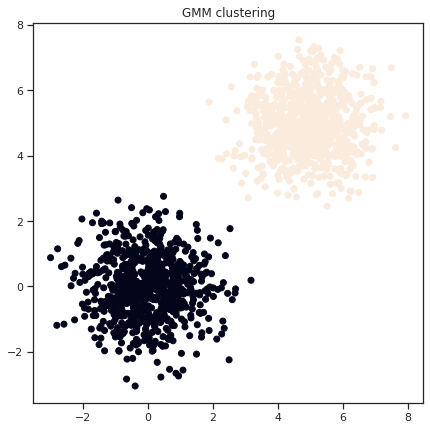

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

<Figure size 864x864 with 0 Axes>

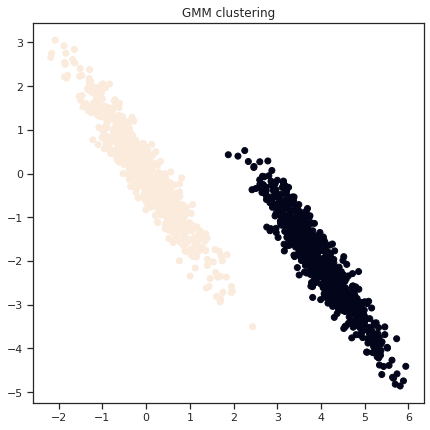

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 1500
centers = [(0, 0), (10, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()


# 2.4 Comparing clustering methods:


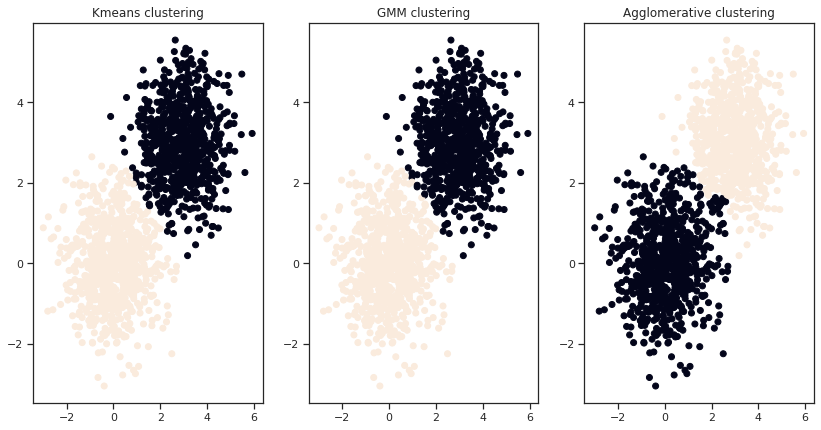

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture

# Generate data:
n_samples = 1500
centers = [(0, 0), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=2).fit_predict(X) 


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

## Cluster evaluation: 

Compute the correct and incorrect clustering occurences in each method:


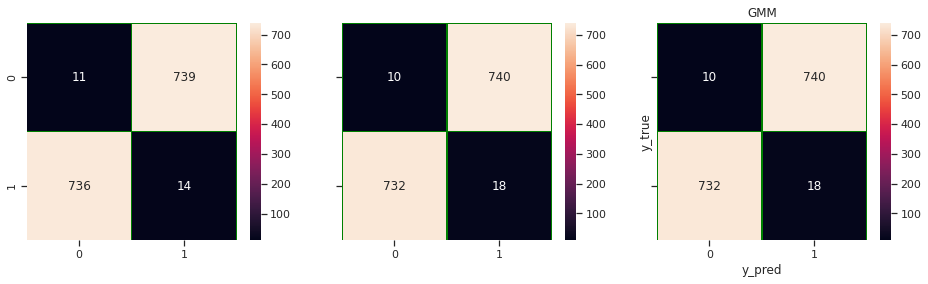

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y,clust_kmeans)
cm2 = confusion_matrix(y,clust_agg)
cm3 = confusion_matrix(y,clust_gmm)

fig, ax = plt.subplots(1, 3, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')

sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[2])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('GMM')
plt.show()

# 2.5 GMM model selection: How many clusters?:

A simple example on GMM model selection: 

[7057.935233238895]
[7057.935233238895, 6892.165189411065]
[7057.935233238895, 6892.165189411065, 6827.307110000295]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295, 6891.440925808451]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295, 6891.440925808451, 6913.331590420243]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295, 6891.440925808451, 6913.331590420243, 6935.827049867527]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295, 6891.440925808451, 6913.331590420243, 6935.827049867527, 6947.002191581227]
[7057.935233238895, 6892.165189411065, 6827.307110000295, 6853.6918421361, 6870.2109568037295, 6891.440925808451, 6913.331590420243, 6935.82704

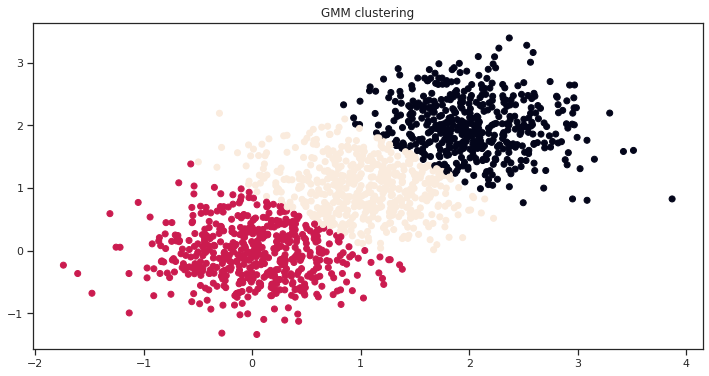

In [63]:
from sklearn.datasets import make_blobs
import numpy as np

n_clusters = 3
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=[[1,1],[0,0],[2,2]], cluster_std = [0.5,0.5,0.5], n_features=2,random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2,random_state=random_state)

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

## GMM clustering with different covariance matrix structures:

Automatically created module for IPython interactive environment


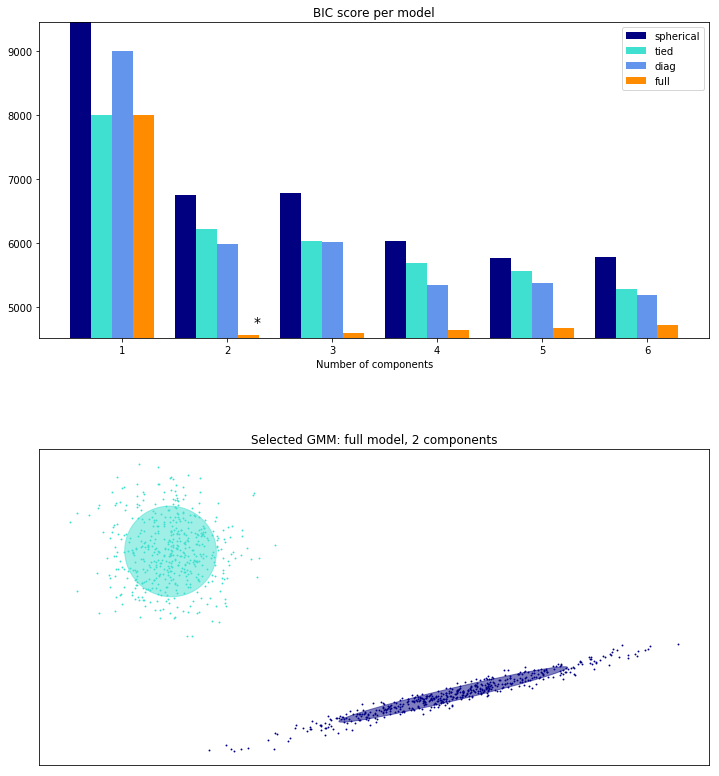

In [ ]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(12, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()